# Linear Regression Models
* Normal Equation
* Batch Gradient Descent
* Mini Batch Gradient Descent
* Stochastic Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 10 examples, 2 features, [1, 20]
np.random.seed(42)
X = np.arange(1, 21).reshape(10, 2) + np.random.normal(scale=1, size=(10, 2)) # mean = 0, std_dev = 1
y = np.linspace(1, 20, num=10)

print(X)
print(y)

[[ 1.49671415  1.8617357 ]
 [ 3.64768854  5.52302986]
 [ 4.76584663  5.76586304]
 [ 8.57921282  8.76743473]
 [ 8.53052561 10.54256004]
 [10.53658231 11.53427025]
 [13.24196227 12.08671976]
 [13.27508217 15.43771247]
 [15.98716888 18.31424733]
 [18.09197592 18.5876963 ]]
[ 1.          3.11111111  5.22222222  7.33333333  9.44444444 11.55555556
 13.66666667 15.77777778 17.88888889 20.        ]


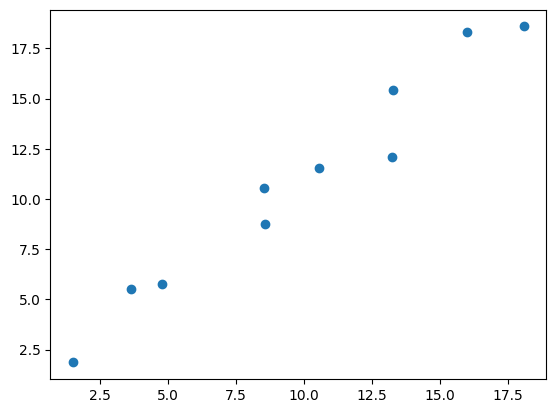

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Linear Regression

`LinearRegression()` will use `Normal Equation` to find optimal parameters.

In [4]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X, y)

LinearRegression()

In [5]:
print("Optimal Parameters:\n")
print(lin_model.intercept_, end=" ")
print(lin_model.coef_)

Optimal Parameters:

-1.4093504270570243 [0.6932152  0.47087181]


In [6]:
lin_mod_predictions = lin_model.predict(X)
print("Linear Model Predictions:\n", lin_mod_predictions)

Linear Model Predictions:
 [ 0.50483344  3.71992179  4.60938927  8.66622818  9.46833394 11.32593131
 13.46147473 15.06232195 18.29686087 19.88470452]


In [7]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

bias_terms = np.ones(10, dtype=int).reshape(10, 1)
X1 = np.append(arr=bias_terms, values=X, axis=1)
print("Optimal Parameters:\n", normal_equation(X1, y))

Optimal Parameters:
 [-1.40935043  0.6932152   0.47087181]


We can see that parameters are same.

## Gradient Descent

`Batch Gradient Descent`: Parameters are updated after computing the gradient of the error with respect to the entire training set  
`Stochastic Gradient Descent`: Parameters are updated after computing the gradient of the error with respect to a single training example  
`Mini-Batch Gradient Descent`: Parameters are updated after computing the gradient of  the error with respect to a subset of the training set

### Batch Gradient Descent

In [8]:
def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    # Initialize model parameters (weights and bias) with random values
    np.random.seed(0)
    y = y.reshape(-1, 1)
    num_features = X.shape[1]
    m = X.shape[0]
    weights = np.random.rand(num_features, 1)  # [0, 1) of shape given
    bias = np.random.rand(1)
 
    # History to store cost values over iterations
    cost_history = []
 
    # Batch Gradient Descent
    for iteration in range(num_iterations):
        predictions = np.dot(X, weights) + bias
        mse_cost = np.mean((predictions - y)**2) / (2 * m)
        cost_history.append(mse_cost)
 
        gradient_weights = (1 / len(y)) * np.dot(X.T, (predictions - y))
        gradient_bias = (1 / len(y)) * np.sum(predictions - y)
 
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
 
        # Print the current cost every 100 iterations
        if iteration % 50 == 0:
            print(f"Iteration {iteration}, Cost: {mse_cost}")
 
    return weights, bias, cost_history

def batch_predict(X, w, b):
    predictions = np.dot(X, w) + b
    return predictions


learning_rate = 0.001
num_iterations = 10000
opt_weights, opt_bias, cost_history = batch_gradient_descent(X, y, learning_rate=learning_rate, num_iterations=num_iterations)

print("\nOptimized Weights:", opt_weights)
print("Optimized Bias:", opt_bias)

batch_predictions = batch_predict(X, opt_weights, opt_bias)
print("\nPredictions:\n", batch_predictions)

Iteration 0, Cost: 0.5604658697169314
Iteration 50, Cost: 0.06485356782485904
Iteration 100, Cost: 0.06326807044910739
Iteration 150, Cost: 0.061757744411416717
Iteration 200, Cost: 0.06031835551331335
Iteration 250, Cost: 0.058945922708905064
Iteration 300, Cost: 0.0576367026998693
Iteration 350, Cost: 0.056387175472564055
Iteration 400, Cost: 0.055194030719551514
Iteration 450, Cost: 0.05405415509137494
Iteration 500, Cost: 0.05296462022774575
Iteration 550, Cost: 0.05192267152041315
Iteration 600, Cost: 0.05092571756291282
Iteration 650, Cost: 0.049971320245134544
Iteration 700, Cost: 0.04905718545322779
Iteration 750, Cost: 0.048181154337780065
Iteration 800, Cost: 0.04734119511547601
Iteration 850, Cost: 0.04653539537157474
Iteration 900, Cost: 0.045761954832544735
Iteration 950, Cost: 0.04501917858007366
Iteration 1000, Cost: 0.044305470679433884
Iteration 1050, Cost: 0.04361932819683868
Iteration 1100, Cost: 0.042959335581978876
Iteration 1150, Cost: 0.04232415939338826
Iteratio

[]

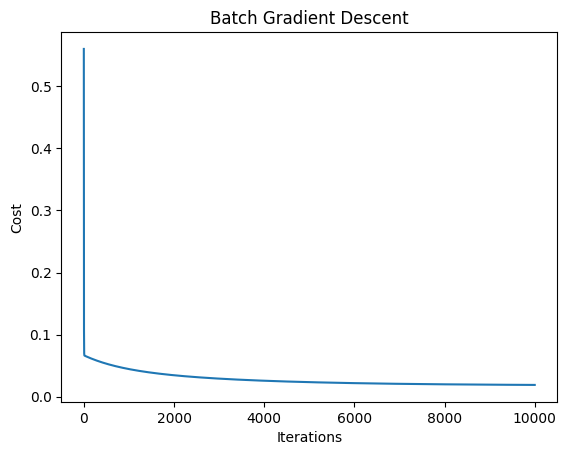

In [9]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title('Batch Gradient Descent')
plt.plot()

## Stochastic Gradient 

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.001, random_state=42)
sgd_reg.fit(X, y)
sgd_predictions = sgd_reg.predict(X)

In [11]:
print("Optimal Parameters:")
print(sgd_reg.intercept_, end=" ")
print(sgd_reg.coef_)

Optimal Parameters:
[0.01029964] [0.52433962 0.53532415]


In [12]:
lin_model_rmse = np.sqrt(mean_squared_error(y, lin_mod_predictions))
batch_rmse = np.sqrt(mean_squared_error(y, batch_predictions))
sgd_rmse = np.sqrt(mean_squared_error(y, sgd_predictions))

print("Linear Model RMSE: ", lin_model_rmse)
print("Batch Graadient Descent RMSE: ", batch_rmse)
print("Stochastic Graadient Descent RMSE: ", sgd_rmse)

Linear Model RMSE:  0.5962404051756015
Batch Graadient Descent RMSE:  0.6124930733577119
Stochastic Graadient Descent RMSE:  0.9289628215209289


## Mini-Batch Gradient Descent

In [13]:
import numpy as np

def mini_batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000, batch_size=32):
    # Initialize model parameters (weights and bias) with random values
    y = y.reshape(-1, 1)
    num_features = X.shape[1]
    m = X.shape[0]

    np.random.seed(0)
    weights = np.random.rand(num_features, 1)
    bias = np.random.rand(1)
    
    # History to store cost values over iterations
    cost_history = []
    
    # Mini-Batch Gradient Descent
    for iteration in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Process each mini-batch
        for start in range(0, m, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            # Predictions and cost
            predictions = np.dot(X_batch, weights) + bias
            mse_cost = np.mean((predictions - y_batch)**2) / (2 * len(y_batch))
            
            # Gradients
            gradient_weights = (1 / len(y_batch)) * np.dot(X_batch.T, (predictions - y_batch))
            gradient_bias = (1 / len(y_batch)) * np.sum(predictions - y_batch)
            
            # Update weights and bias
            weights -= learning_rate * gradient_weights
            bias -= learning_rate * gradient_bias
        
        # Store the cost for this iteration
        cost_history.append(mse_cost)
        
        # Print the cost every 100 iterations
        if iteration % 50 == 0:
            print(f"Iteration {iteration}, Cost: {mse_cost}")
    
    return weights, bias, cost_history

def mini_batch_predict(X, w, b):
    predictions = np.dot(X, w) + b
    return predictions

learning_rate = 0.001
num_iterations = 1000
batch_size = 2

opt_weights, opt_bias, cost_history = mini_batch_gradient_descent(
    X, y, learning_rate=learning_rate, num_iterations=num_iterations, batch_size=batch_size
)

print("\nOptimized Weights:", opt_weights)
print("Optimized Bias:", opt_bias)

mini_batch_predictions = mini_batch_predict(X, opt_weights, opt_bias)
print("\nPredictions:\n", mini_batch_predictions)

Iteration 0, Cost: 0.8546330459916341
Iteration 50, Cost: 0.4809949084067276
Iteration 100, Cost: 0.18104332376716525
Iteration 150, Cost: 0.4782753597217878
Iteration 200, Cost: 0.48698067178639254
Iteration 250, Cost: 0.4121969548187237
Iteration 300, Cost: 0.48724029705954547
Iteration 350, Cost: 0.5347795457684665
Iteration 400, Cost: 0.14081449787789854
Iteration 450, Cost: 0.24130879268400382
Iteration 500, Cost: 0.4498654923735789
Iteration 550, Cost: 0.30523404896301065
Iteration 600, Cost: 0.18653753433945483
Iteration 650, Cost: 0.17079210436649678
Iteration 700, Cost: 0.016510186935580526
Iteration 750, Cost: 0.024168026116118582
Iteration 800, Cost: 0.13127470630118956
Iteration 850, Cost: 0.009765740404641603
Iteration 900, Cost: 0.1788172058365613
Iteration 950, Cost: 0.5430831114690172

Optimized Weights: [[0.789135  ]
 [0.32771976]]
Optimized Bias: [-0.64853107]

Predictions:
 [[ 1.14270603]
 [ 4.03999365]
 [ 5.00195256]
 [ 8.99488765]
 [ 9.53821051]
 [11.44626309]
 [13

[]

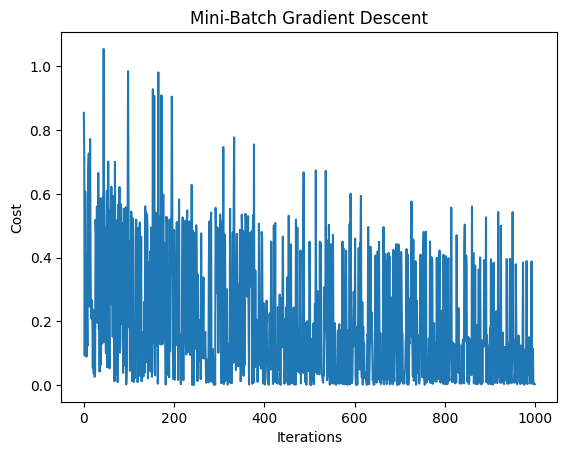

In [14]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Mini-Batch Gradient Descent")
plt.plot()

In [15]:
lin_model_rmse = np.sqrt(mean_squared_error(y, lin_mod_predictions))
batch_rmse = np.sqrt(mean_squared_error(y, batch_predictions))
sgd_rmse = np.sqrt(mean_squared_error(y, sgd_predictions))
mini_batch_rmse = np.sqrt(mean_squared_error(y, mini_batch_predictions))

print("Linear Model RMSE: ", lin_model_rmse)
print("Batch Graadient Descent RMSE: ", batch_rmse)
print("Stochastic Graadient Descent RMSE: ", sgd_rmse)
print("Mini-Batch Graadient Descent RMSE: ", mini_batch_rmse)

Linear Model RMSE:  0.5962404051756015
Batch Graadient Descent RMSE:  0.6124930733577119
Stochastic Graadient Descent RMSE:  0.9289628215209289
Mini-Batch Graadient Descent RMSE:  0.6783438018673712


# Student Performance Prediction

In [16]:
import pandas as pd
data = pd.read_csv('Student_Performance.csv')
print(data.shape)
data.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [18]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [19]:
data.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


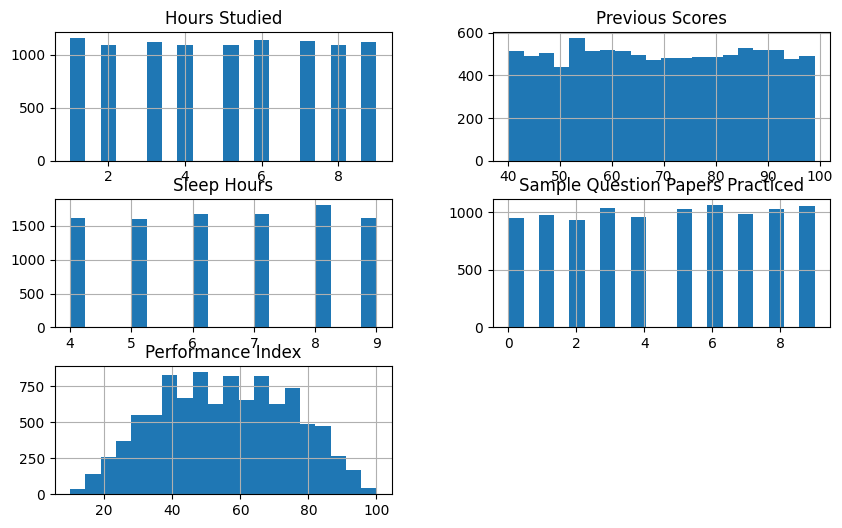

In [20]:
data.hist(bins=20, figsize=(10, 6))
plt.show()

In [21]:
data[['Extracurricular Activities']].head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
data_tr = encoder.fit_transform(data[['Extracurricular Activities']])

cat_data_encoded = pd.DataFrame(data_tr, columns=encoder.get_feature_names_out(), index=data.index)
cat_data_encoded.head()

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [23]:
stu_data_prep = pd.concat([data.drop('Extracurricular Activities', axis=1), cat_data_encoded], axis=1)
stu_data_prep.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stu_data_prep, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

(8000, 7)
(2000, 7)


In [25]:
X_train = train_set.drop(['Performance Index'], axis=1)
y_train = train_set[['Performance Index']]
X_test = test_set.drop(['Performance Index'], axis=1)
y_test = test_set[['Performance Index']]


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 6)
(8000, 1)
(2000, 6)
(2000, 1)


In [26]:
from sklearn.preprocessing import StandardScaler

# Create and fit scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform test data
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_arr = np.array(X_train_scaled)
y_train_arr = np.array(y_train)

X_test_arr = np.array(X_test_scaled)
y_test_arr = np.array(y_test)

# Training Errors

## `Linear Model - Normal Equation`

In [43]:
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train_arr, y_train_arr)

lin_pred = lin_model.predict(X_train_arr)
lin_rmse = np.sqrt(mean_squared_error(y_train, lin_pred))

lin_r2 = r2_score(y_train, lin_pred)

print("R-squared (R²):", lin_r2)
print("RMSE: ", lin_rmse.round(2))

R-squared (R²): 0.9886889671941134
RMSE:  2.04


## `Batch Gradient Descent`

In [45]:
w_batch, b_batch, history = batch_gradient_descent(X_train_scaled, y_train_arr, learning_rate=0.01, num_iterations=1000)
batch_pred = batch_predict(X_train_scaled, w_batch, b_batch)
batch_rmse = np.sqrt(mean_squared_error(batch_pred, y_train))

batch_r2 = r2_score(y_train, batch_pred)

print()
print("R-squared (R²)", batch_r2)
print("RMSE: ", batch_rmse.round(2))

Iteration 0, Cost: 0.2091370194471744
Iteration 50, Cost: 0.0767720132513798
Iteration 100, Cost: 0.028287870569262973
Iteration 150, Cost: 0.010527802008269265
Iteration 200, Cost: 0.004021918795053759
Iteration 250, Cost: 0.0016385888441049236
Iteration 300, Cost: 0.000765459886735882
Iteration 350, Cost: 0.00044557838519296956
Iteration 400, Cost: 0.0003283813466071687
Iteration 450, Cost: 0.0002854414277156527
Iteration 500, Cost: 0.00026970800618022903
Iteration 550, Cost: 0.0002639429594726582
Iteration 600, Cost: 0.0002618304410823486
Iteration 650, Cost: 0.0002610563064201347
Iteration 700, Cost: 0.0002607726117258281
Iteration 750, Cost: 0.0002606686424682248
Iteration 800, Cost: 0.000260630537811573
Iteration 850, Cost: 0.000260616571848115
Iteration 900, Cost: 0.00026061145286314754
Iteration 950, Cost: 0.00026060957649832014

R-squared (R²) 0.9886898617916502
RMSE:  2.04


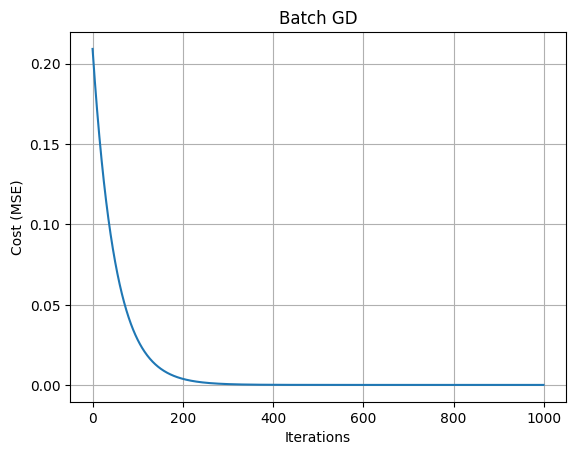

In [46]:
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Batch GD")
plt.grid(True)
plt.show()

## `Mini-Batch gradient Descent`

In [56]:
w_mini, b_mini, history = mini_batch_gradient_descent(X_train_scaled, y_train_arr, learning_rate=0.001, num_iterations=1000, batch_size=1000)
mini_batch_pred = mini_batch_predict(X_train_scaled, w_mini, b_mini)
mini_batch_rmse = np.sqrt(mean_squared_error(mini_batch_pred, y_train))

mini_batch_r2 = r2_score(y_train, mini_batch_pred)

print()
print("R-squared (R²)", mini_batch_r2)
print(mini_batch_rmse.round(2))

Iteration 0, Cost: 1.6640136165797044
Iteration 50, Cost: 0.7616839297448553
Iteration 100, Cost: 0.33077701541867394
Iteration 150, Cost: 0.15024265940841322
Iteration 200, Cost: 0.06797735918149615
Iteration 250, Cost: 0.031963062994186185
Iteration 300, Cost: 0.015570705875918644
Iteration 350, Cost: 0.008556345187891992
Iteration 400, Cost: 0.004999186763409484
Iteration 450, Cost: 0.0032425541460127665
Iteration 500, Cost: 0.0024941596834961227
Iteration 550, Cost: 0.0024331659873232346
Iteration 600, Cost: 0.002310759352167792
Iteration 650, Cost: 0.002080206491743738
Iteration 700, Cost: 0.0019964119466551944
Iteration 750, Cost: 0.0021980624532464497
Iteration 800, Cost: 0.0020884693872509487
Iteration 850, Cost: 0.002048138323594047
Iteration 900, Cost: 0.0019156721105619552
Iteration 950, Cost: 0.0021327538167960655

R-squared (R²) 0.988688850480432
2.04


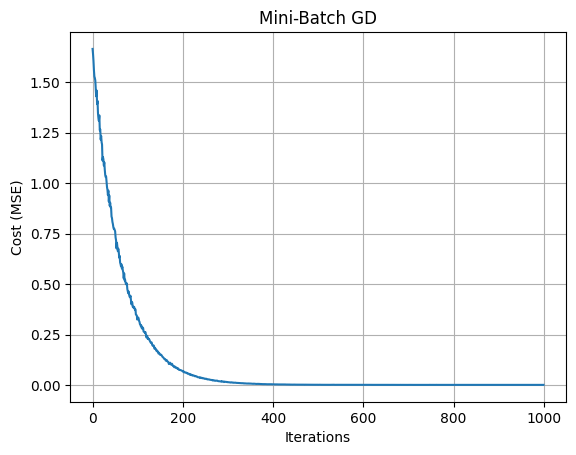

In [48]:
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Mini-Batch GD")
plt.grid(True)
plt.show()

## `Stochastic Gradient Descent`

In [49]:
sgd = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.1, random_state=42)
sgd.fit(X_train_scaled, y_train_arr.reshape(-1))
sgd_pred = sgd.predict(X_train_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_train, sgd_pred))

sgd_r2 = r2_score(y_train, sgd_pred)

print()
print("R-squared (R²)", sgd_r2)
print(sgd_rmse.round(2))


R-squared (R²) 0.983931561935486
2.43


## Test Errors

In [52]:
lin_pred = lin_model.predict(X_test_arr)
lin_rmse = np.sqrt(mean_squared_error(y_true=y_test_arr, y_pred=lin_pred))

lin_r2 = r2_score(y_test_arr, lin_pred)

print()
print("R-squared (R²)", lin_r2)
print("RMSE: ", lin_rmse.round(2))


R-squared (R²) 0.9889862305650765
RMSE:  2.02


In [53]:
batch_pred = batch_predict(X_test_arr, w_batch, b_batch)
batch_rmse = np.sqrt(mean_squared_error(y_true=y_test_arr, y_pred=batch_pred))

batch_r2 = r2_score(y_test_arr, batch_pred)

print()
print("R-squared (R²)", batch_r2)
print("RMSE: ", batch_rmse.round(2))


R-squared (R²) 0.9889837798670725
RMSE:  2.02


In [54]:
mini_batch_pred = mini_batch_predict(X_test_arr, w_mini, b_mini)
mini_batch_rmse = np.sqrt(mean_squared_error(y_true=y_test_arr, y_pred=mini_batch_pred))

mini_batch_r2 = r2_score(y_test_arr, mini_batch_pred)

print()
print("R-squared (R²)", mini_batch_r2)
print("RMSE: ", mini_batch_rmse.round(2))


R-squared (R²) 0.9889862134732185
RMSE:  2.02


In [57]:
sgd_pred = sgd.predict(X_test_arr)
sgd_rmse = np.sqrt(mean_squared_error(y_true=y_test_arr, y_pred=sgd_pred))

sgd_r2 = r2_score(y_test_arr, sgd_pred)

print()
print("R-squared (R²)", sgd_r2)
print("RMSE: ", sgd_rmse.round(2))


R-squared (R²) 0.9843357000748009
RMSE:  2.41
